<a href="https://colab.research.google.com/github/bilnazir/stockmarketprediction/blob/main/fyp_GRU_apple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas-ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=0aa692ebe13c5963e6a315cd096b07424cfc71d813941376e60b312cc3db18d6
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas-ta


In [2]:
 # Module import
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from scipy.stats import median_abs_deviation
from tensorflow.keras import layers, models, optimizers, losses, callbacks,\
                             regularizers
from tensorflow.keras.optimizers import Nadam, RMSprop
import pandas_ta as ta
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn import linear_model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError

In [3]:
df = yf.download(tickers=['AAPL'], start='2012-01-01', end='2022-06-20')

df_3 = df.dropna()
df_3

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.402627,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.469281,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.607714,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.739513,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.719307,394024400
...,...,...,...,...,...,...
2022-06-13,132.869995,135.199997,131.440002,131.880005,130.253891,122207100
2022-06-14,133.130005,133.889999,131.479996,132.759995,131.123001,84784300
2022-06-15,134.289993,137.339996,132.160004,135.429993,133.760117,91533000


In [4]:
# Stock indicators for Processing

df_3['RSI']=ta.rsi(df_3.Close, length=15)
df_3['EMAF']=ta.ema(df_3.Close, length=20)
df_3['EMAM']=ta.ema(df_3.Close, length=100)
df_3['EMAS']=ta.ema(df_3.Close, length=150)

df_3['Target'] = df_3['Adj Close']-df_3.Open
df_3['Target'] = df_3['Target'].shift(-1)

df_3['TargetClass'] = [1 if df_3.Target[i]>0 else 0 for i in range(len(df_3))]

df_3['Target Adj Close'] = df_3['Adj Close'].shift(-1)

df_3.dropna(inplace=True)
df_3.reset_index(inplace = True)
df_3.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)
df_3


<ipython-input-4-c6e0b158a695>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_3['TargetClass'] = [1 if df_3.Target[i]>0 else 0 for i in range(len(df_3))]


,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,Target Adj Close
0,22.046070,22.316786,21.973572,18.776003,62.709034,21.487612,20.399588,19.740979,-3.515242,0,18.726543
1,22.241785,22.321428,22.072857,18.726543,61.648029,21.553111,20.434751,19.773222,-3.426203,0,18.694868
2,22.121071,22.281429,22.039286,18.694868,60.940716,21.608801,20.468476,19.804542,-3.264580,0,18.801491
3,22.066071,22.204643,22.064285,18.801491,61.334533,21.662147,20.502149,19.835858,-3.265913,0,18.830873
4,22.096786,22.205713,22.096430,18.830873,61.794709,21.713711,20.535840,19.867219,-3.181656,0,19.082273
...,...,...,...,...,...,...,...,...,...,...,...
2478,140.279999,140.759995,137.059998,135.439178,37.415051,146.553027,157.175136,157.235706,-2.616104,0,130.253891
2479,132.869995,135.199997,131.440002,130.253891,33.560117,145.155596,156.674242,156.899869,-2.007004,0,131.123001
2480,133.130005,133.889999,131.479996,131.123001,34.767148,143.975063,156.200693,156.580135,-0.529877,0,133.760117
2481,134.289993,137.339996,132.160004,133.760117,38.404894,143.161247,155.789392,156.300001,-3.623688,0,128.456314


In [5]:
df_4 = df_3.iloc[:, 0:11]
pd.set_option('display.max_columns', None)
df_4.head(10)
df_4

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,Target Adj Close
0,22.046070,22.316786,21.973572,18.776003,62.709034,21.487612,20.399588,19.740979,-3.515242,0,18.726543
1,22.241785,22.321428,22.072857,18.726543,61.648029,21.553111,20.434751,19.773222,-3.426203,0,18.694868
2,22.121071,22.281429,22.039286,18.694868,60.940716,21.608801,20.468476,19.804542,-3.264580,0,18.801491
3,22.066071,22.204643,22.064285,18.801491,61.334533,21.662147,20.502149,19.835858,-3.265913,0,18.830873
4,22.096786,22.205713,22.096430,18.830873,61.794709,21.713711,20.535840,19.867219,-3.181656,0,19.082273
...,...,...,...,...,...,...,...,...,...,...,...
2478,140.279999,140.759995,137.059998,135.439178,37.415051,146.553027,157.175136,157.235706,-2.616104,0,130.253891
2479,132.869995,135.199997,131.440002,130.253891,33.560117,145.155596,156.674242,156.899869,-2.007004,0,131.123001
2480,133.130005,133.889999,131.479996,131.123001,34.767148,143.975063,156.200693,156.580135,-0.529877,0,133.760117
2481,134.289993,137.339996,132.160004,133.760117,38.404894,143.161247,155.789392,156.300001,-3.623688,0,128.456314


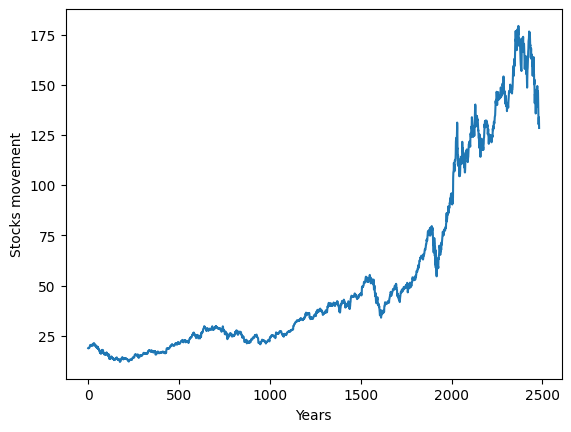

In [6]:
df_4_AC=df_4['Adj Close']
plt.ylabel('Stocks movement')
plt.xlabel('Years')
plt.plot(df_4_AC)

In [7]:
sc = MinMaxScaler(feature_range=(0,1))
df_4_scaled = sc.fit_transform(df_3)
print(df_4_scaled)

[[0.04852644 0.0476992  0.0497078  ... 0.3477173  0.         0.04048717]
 [0.04968607 0.04772673 0.0503082  ... 0.3527973  0.         0.04029786]
 [0.04897083 0.04748958 0.05010518 ... 0.36201849 0.         0.04093509]
 ...
 [0.70670826 0.70919299 0.7119125  ... 0.51804344 0.         0.72798769]
 [0.71358129 0.72964729 0.71602463 ... 0.34153005 0.         0.69628941]
 [0.70048691 0.70029981 0.69715738 ... 0.54073225 0.         0.70514357]]


In [8]:
# Multiple feature for data
X = []

backcandles = 40
print(df_4_scaled.shape[0])
for j in range(8):  # Targeted columns 2
    X.append([])
    for i in range(backcandles, df_4_scaled.shape[0]):#backcandles+2
        X[j].append(df_4_scaled[i-backcandles:i, j])

X=np.moveaxis(X, [0], [2])
X, yi =np.array(X), np.array(df_4_scaled[backcandles:,-1]) #scaling backwards
y=np.reshape(yi,(len(yi),1))
print(X)
print(X.shape)
print(y)
print(y.shape)

2483
[[[0.04852644 0.0476992  0.0497078  ... 0.04107401 0.03092599 0.02341366]
  [0.04968607 0.04772673 0.0503082  ... 0.04148362 0.03116045 0.02363486]
  [0.04897083 0.04748958 0.05010518 ... 0.04183189 0.03138532 0.02384973]
  ...
  [0.05847214 0.05983204 0.05944592 ... 0.05820785 0.04315488 0.0344144 ]
  [0.06153202 0.0596076  0.06082812 ... 0.05796818 0.04336499 0.0346398 ]
  [0.05992589 0.0586844  0.05861442 ... 0.05758733 0.04353458 0.03483719]]

 [[0.04968607 0.04772673 0.0503082  ... 0.04148362 0.03116045 0.02363486]
  [0.04897083 0.04748958 0.05010518 ... 0.04183189 0.03138532 0.02384973]
  [0.04864495 0.04703434 0.05025636 ... 0.0421655  0.03160983 0.02406457]
  ...
  [0.06153202 0.0596076  0.06082812 ... 0.05796818 0.04336499 0.0346398 ]
  [0.05992589 0.0586844  0.05861442 ... 0.05758733 0.04353458 0.03483719]
  [0.05794733 0.05648228 0.05735099 ... 0.05728359 0.04370987 0.0350382 ]]

 [[0.04897083 0.04748958 0.05010518 ... 0.04183189 0.03138532 0.02384973]
  [0.04864495 0.0

In [9]:
# split data into training and testing
train_test_split = int(len(X)*0.7)
print(train_test_split)
X_train, X_test = X[:train_test_split], X[train_test_split:]
y_train, y_test = y[:train_test_split], y[train_test_split:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

1710
(1710, 40, 8)
(733, 40, 8)
(1710, 1)
(733, 1)
[[0.05011663]
 [0.04927488]
 [0.04670254]
 ...
 [0.22036071]
 [0.22702933]
 [0.2293627 ]]


In [10]:
# Define the input shape
input_shape = (backcandles, 8)
input_layer = layers.Input(shape=input_shape, name='Input')

# GRU Layer 1
gru_1 = layers.GRU(units=100, return_sequences=True, activation='tanh',
                   kernel_regularizer=regularizers.l2(0.001), dropout=0.1, recurrent_dropout=0.1)(input_layer)

# Additional GRU Layer
gru_2 = layers.GRU(units=50, return_sequences=False, activation='tanh')(gru_1)

# Dense Layer
dense_1 = layers.Dense(units=50, activation='relu')(gru_2)

# Output Layer
output_layer = layers.Dense(1, activation='linear')(dense_1)


# Create the model
gru_model = models.Model(inputs=input_layer, outputs=output_layer, name='GRU_Model')
gru_model.summary()


Model: "GRU_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input (InputLayer)                   │ (None, 40, 8)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 40, 100)             │          33,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 50)                  │          22,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,401 (228.13 KB)

 Trainable params: 58,401 (228.13 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Compile the model
gru_model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])


In [12]:
# Train the model
history = gru_model.fit( X_train,
    y_train,
    batch_size=64,
    epochs=128,
    validation_data=(X_test, y_test),
    verbose=1,)

print(history.history.keys)

Epoch 1/128
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 111ms/step - loss: 0.0168 - mean_absolute_error: 0.0359 - val_loss: 0.0289 - val_mean_absolute_error: 0.1257
Epoch 2/128
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - loss: 0.0091 - mean_absolute_error: 0.0134 - val_loss: 0.0201 - val_mean_absolute_error: 0.1059
Epoch 3/128
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - loss: 0.0056 - mean_absolute_error: 0.0125 - val_loss: 0.0253 - val_mean_absolute_error: 0.1323
Epoch 4/128
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - loss: 0.0035 - mean_absolute_error: 0.0116 - val_loss: 0.0262 - val_mean_absolute_error: 0.1417
Epoch 5/128
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 0.0023 - mean_absolute_error: 0.0111 - val_loss: 0.0217 - val_mean_absolute_error: 0.1289
Epoch 6/128
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 0.0015 - mean_absolute_error: 0.0101 - val_loss: 0.0188 - val_mean_absolute_error: 0.1202
Epoch 7/128
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - loss: 0.0011 - mean_absolute_error: 0.0114 

23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step
[0.21286313] [0.22911793]
[0.215569] [0.22674131]
[0.21685831] [0.22777835]
[0.21620573] [0.23057253]
[0.21638472] [0.22927632]
[0.21793757] [0.23541199]
[0.21795616] [0.22877215]
[0.2230896] [0.22242036]
[0.22279349] [0.20703779]
[0.21697533] [0.21230938]


<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

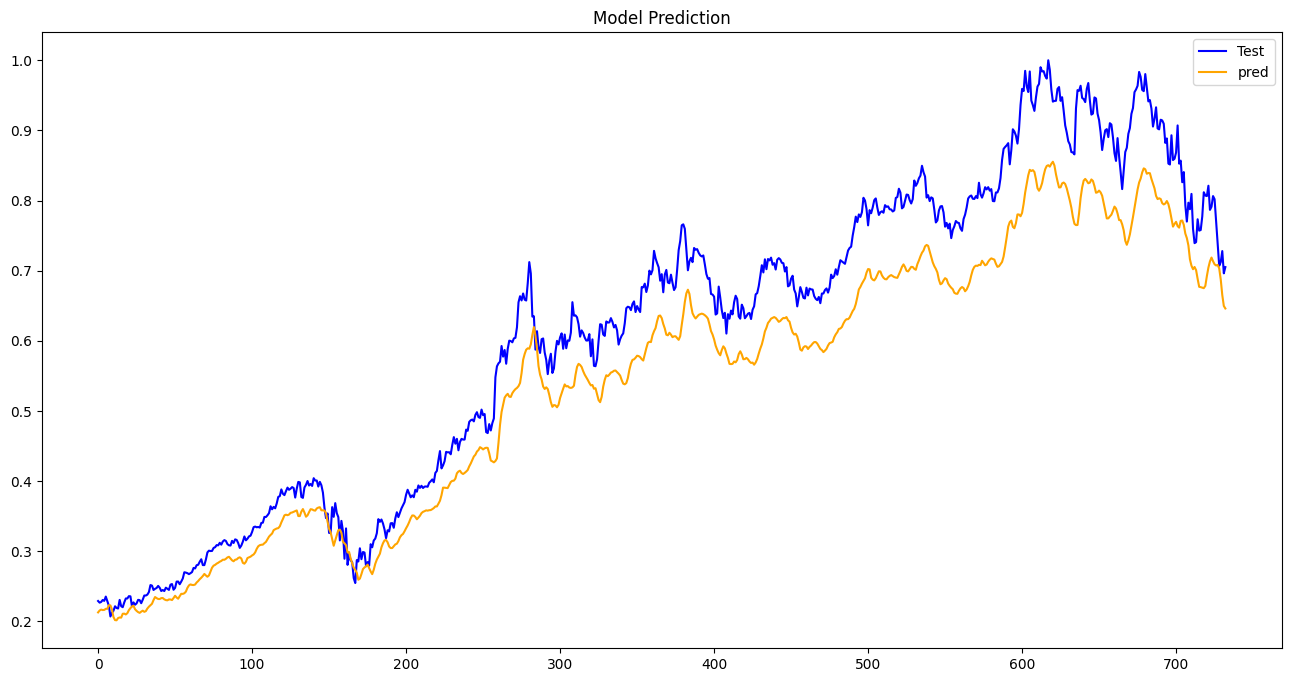

In [13]:
# Make predictions on test data

# Model prediction
y_pred = gru_model.predict(X_test)
for i in range(10):
    print(y_pred[i], y_test[i])

    plt.figure(figsize=(16,8))


plt.plot(y_test, color = 'blue', label = 'Test')
plt.plot(y_pred, color = 'orange', label = 'pred')
plt.legend(loc=0)
plt.title('Model Prediction')
plt.show()

In [14]:
# Convert training history to datafram for viewing and graphing.
hist = pd.DataFrame(history.history)
hist.head()

,loss,mean_absolute_error,val_loss,val_mean_absolute_error
0,0.013992,0.024236,0.028866,0.125662
1,0.008209,0.013080,0.020106,0.105871
2,0.005078,0.012683,0.025250,0.132314
3,0.003195,0.011535,0.026199,0.141700
4,0.002060,0.010864,0.021691,0.128897


In [15]:
# Evaluate the model
loss = gru_model.evaluate(X_test, y_test, verbose=0)[0]  # Extract the loss value from the list
y_pred = gru_model.predict(X_test)
mae = np.mean(np.abs(y_pred - y_test))  # Calculate MAE manually

print(f"Test loss: {loss:.4f}, Test MAE: {mae:.4f}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Test loss: 0.0063, Test MAE: 0.0690


In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2) score: {r2:.4f}")

Mean Absolute Error (MAE): 0.0690
Mean Squared Error (MSE): 0.0063
Root Mean Squared Error (RMSE): 0.0792
R-squared (R2) score: 0.8772


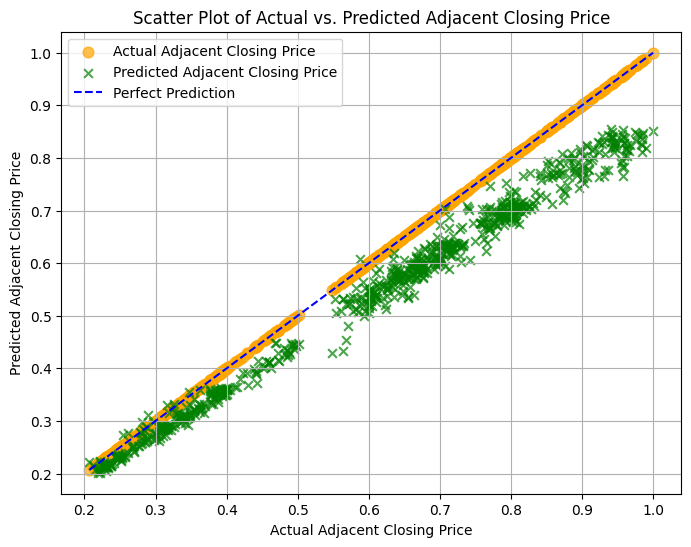

In [17]:
# Scatter plot of actual vs. predicted adjacent closing prices
plt.figure(figsize=(8, 6))  # Increase figure size for better visibility

# Plot actual values as orange circles with larger markers
plt.scatter(y_test, y_test, color='orange', label='Actual Adjacent Closing Price', alpha=0.7, s=60)

# Plot predicted values as black crosses with smaller markers
plt.scatter(y_test, y_pred, color='green', label='Predicted Adjacent Closing Price', alpha=0.7, s=40, marker='x')

# Plot the diagonal line for perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Adjacent Closing Price')
plt.ylabel('Predicted Adjacent Closing Price')
plt.title('Scatter Plot of Actual vs. Predicted Adjacent Closing Price')
plt.legend()
plt.grid(True)  # Add grid lines for better readability
plt.show()

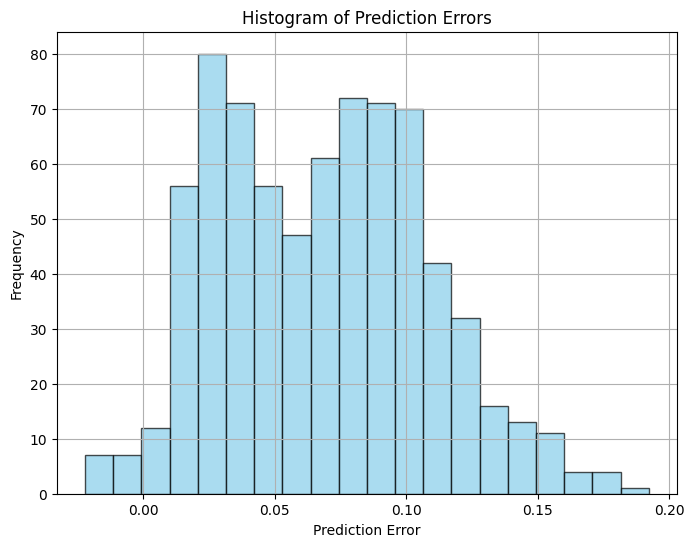

In [18]:
# Histogram of prediction errors
errors = y_test - y_pred

plt.figure(figsize=(8, 6))  # Increase figure size for better visibility

plt.hist(errors, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Errors')

# Add grid lines for better readability
plt.grid(True)

plt.show()